In [0]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import numpy as np
import tensorflow.compat.v1 as tfc
import tensorflow as tf
from PIL import Image
import os

In [3]:
device = torch.device("cuda:0") # Uncomment this to run on GPU
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [0]:
## to create numpy arrays run the code below
# ndct = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/train/*'))
# ldct = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/train/*'))

# ndct_test = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/ndct/test/*'))
# ldct_test = sorted(glob('/content/drive/My Drive/Colab Notebooks/CT_data/sparseview_60/test/*'))

# print(len(ndct))
# print(len(ldct))
# print(len(ndct_test))
# print(len(ldct_test))

# ndct_imgs_train = []
# for i in range(0, len(ndct)):                                                                                                                                      
#     f = open(ndct[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ndct_imgs_train.append(a)
#     f.close()
# print("len(ndct_imgs_train)....: ",len(ndct_imgs_train))
# ndct_train = np.asarray(ndct_imgs_train)
# ndct_train = ndct_train.reshape(3600,512,512,1)
# np.save('/content/drive/My Drive/Colab Notebooks/unet_pytorch/ndct_train_3600', ndct_train) # save the file as "ndct_train_3600.npy" 



# ldct_imgs_train = []
# for i in range(0, len(ldct)):
# #for i in range(0, 600):
#     f = open(ldct[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ldct_imgs_train.append(a)
#     f.close()
# print("len(ldct_imgs_train)....: ",len(ldct_imgs_train))
# ldct_train = np.asarray(ldct_imgs_train)
# ldct_train = ldct_train.reshape(3600,512,512,1)
# np.save('/content/drive/My Drive/Colab Notebooks/unet_pytorch/sparseview_60_train_3600', ldct_train) # save the file as "sparseview_60_train_3600.npy" 

# ndct_imgs_test = []
# for i in range(0, len(ndct_test)):
# # for i in range(0, 100):
#     f = open(ndct_test[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ndct_imgs_test.append(a)
#     f.close()
# print("len(ndct_imgs_test)....: ",len(ndct_imgs_test))
# ndct_test = np.asarray(ndct_imgs_test)
# ndct_test = ndct_test.reshape(354,512,512,1)
# np.save('/content/drive/My Drive/Colab Notebooks/unet_pytorch/ndct_test_354', ndct_test) # save the file as "ndct_test.npy"

# # load the image
# ldct_imgs_test = []
# for i in range(0, len(ldct_test)):
# # for i in range(0, 100):
#     f = open(ldct_test[i],'rb')
#     a = np.fromfile(f, np.float32)
#     ldct_imgs_test.append(a)
#     f.close()
# print("len(ldct_imgs_test)....: ",len(ldct_imgs_test))
# ldct_test = np.asarray(ldct_imgs_test)
# ldct_test = ldct_test.reshape(354,512,512,1)
# np.save('/content/drive/My Drive/Colab Notebooks/unet_pytorch/sparseview_60_test_354', ldct_test) # save the file as "sparseview_60_test.npy" 


In [0]:
# ldct_train = np.load('/content/drive/My Drive/Colab Notebooks/new_idea/sparseview_60_test_354.npy') # loads saved array into variable sparseview_60_test.
# ndct_train = np.load('/content/drive/My Drive/Colab Notebooks/new_idea/ndct_test_354.npy') # loads saved array into variable ndct_test.


In [0]:
ldct_train = np.load('/content/drive/My Drive/Colab Notebooks/new_idea/sparseview_60_train_3600.npy') # loads saved array into variable sparseview_60_train.
ndct_train = np.load('/content/drive/My Drive/Colab Notebooks/new_idea/ndct_train_3600.npy') # loads saved array into variable ndct_train.

In [0]:
ldct_test = np.load('/content/drive/My Drive/Colab Notebooks/new_idea/sparseview_60_test_354.npy') # loads saved array into variable sparseview_60_test.
ndct_test = np.load('/content/drive/My Drive/Colab Notebooks/new_idea/ndct_test_354.npy') # loads saved array into variable ndct_test.


In [6]:
X_test = torch.from_numpy(ldct_test).view(354, 1, 512, 512)
y_test = torch.from_numpy(ndct_test).view(354, 1, 512, 512)
print(X_test.shape)
print(y_test.shape)
X_test, y_test = X_test.to(device), y_test.to(device)

torch.Size([354, 1, 512, 512])
torch.Size([354, 1, 512, 512])


In [0]:
# X_torch = torch.from_numpy(ldct_train).view(3600, 1, 512, 512)
# y_torch = torch.from_numpy(ndct_train).view(3600, 1, 512, 512)
# print(X_torch.shape)
# print(y_torch.shape)
# X_test = torch.from_numpy(ldct_test).view(354, 1, 512, 512)
# y_test = torch.from_numpy(ndct_test).view(354, 1, 512, 512)
# print(X_test.shape)
# print(y_test.shape)


# X_torch, y_torch = X_torch.to(device), y_torch.to(device)
# X_test, y_test = X_test.to(device), y_test.to(device)

In [0]:
def cal_psnr(im1, im2):
    # assert pixel value range is 0-255 and type is uint8
    mse = ((im1.astype(np.float) - im2.astype(np.float)) ** 2).mean()
    maxval = np.amax(im1)
    psnr = 10 * np.log10(maxval ** 2 / mse)
    return psnr

In [0]:
# Needed to get denoised images six at the time
# can't feed all images into a model.
# X_test: sparseview images
# y_test: clean image
def avg_psnr(model2, X_test, y_test):
  model2.eval()
  num_batches = int(354/4) #59
  # denoised_image = torch.empty(354,1,512, 512, dtype=torch.float)
  denoised_image = torch.randn(354,1,512, 512)
  with torch.no_grad():
    for idx in range(num_batches):
      model2.zero_grad()
      denoised_image[idx*4:(idx+1)*4,:,:,:]= model2(X_test[idx*4:(idx+1)*4,:,:,:])

  ## find avg psnr
  psnr_sum =0
  for i in range(len(X_test)):
    psnr = cal_psnr(y_test[i,:,:,:].cpu().data.numpy(), denoised_image[i,:,:,:].cpu().data.numpy())
    psnr_sum += psnr
  avg_psnr = psnr_sum / len(X_test)
  torch.cuda.empty_cache()
  denoised_image = []
  torch.cuda.empty_cache()
  return avg_psnr

In [0]:
## both arrays together are 10GB clearing the variable
# import gc
# ldct_train = [0]
# ndct_train = [0]
# gc.collect()

280

In [0]:
# Denoises all images in test. 
# Saves them in folder "test" as .flt files
def test(model, X_test, y_test):
  model.eval()
  num_batches = int(354/4) #59
  denoised_image = torch.empty(354,1,512, 512, dtype=torch.float)
  with torch.no_grad():
    for idx in range(num_batches):
      model.zero_grad()
      denoised_image[idx*4:(idx+1)*4,:,:,:]= model(X_test[idx*4:(idx+1)*4,:,:,:])
  psnr = avg_psnr(model, X_test, y_test)
  print("avg psnr: ", psnr)
  # save images as .flt files
  save_dir = "/content/drive/My Drive/Colab Notebooks/unet_pytorch/test"
  rawfiles = [open(os.path.join(save_dir, "test_{num:08d}.flt".format(num=index)), 'wb') for index in range (354)]
  for index in range(354):
    img = np.asarray(denoised_image[index,:,:,:])
    img.tofile(rawfiles[index])

In [0]:
PATH = "/content/drive/My Drive/Colab Notebooks/unet_pytorch/unet_weights15.pth"


In [0]:


# Define model
class Unet(nn.Module):
    def __init__(self):
        super(Unet, self).__init__()
        # print(1)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1)
        self.batch1 = nn.BatchNorm2d(num_features=8)
        self.conv2 =  nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.batch2 = nn.BatchNorm2d(num_features=8)
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=2, padding=0)
        
        # print(2)
        self.conv3 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=1)
        self.batch3 = nn.BatchNorm2d(num_features=16)
        self.conv4 =  nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
        self.batch4 = nn.BatchNorm2d(num_features=16)
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=2, padding=0)
        
        # print(3)
        self.conv5 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.batch5 = nn.BatchNorm2d(num_features=32)
        self.conv6 =  nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.batch6 = nn.BatchNorm2d(num_features=32)
        self.pool3 = nn.MaxPool2d(kernel_size=(2, 2), stride=2, padding=0)

        # print(4)
        self.conv7 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.batch7 = nn.BatchNorm2d(num_features=64)
        self.conv8 =  nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.batch8 = nn.BatchNorm2d(num_features=64)
        self.pool4 = nn.MaxPool2d(kernel_size=(2, 2), stride=2, padding=0)
        
        # print(5)
        self.conv9 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.batch9 = nn.BatchNorm2d(num_features=128)
        self.conv10 =  nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.batch10 = nn.BatchNorm2d(num_features=128)

        # print(6)
        self.trans1 = nn.ConvTranspose2d(in_channels=128,out_channels=64, kernel_size=(2, 2), stride=2, padding=0)
        ## concatenate [channels must be add]
        self.conv11 = nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, padding=1)
        self.batch11 = nn.BatchNorm2d(num_features=64)
        self.conv12 =  nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.batch12 = nn.BatchNorm2d(num_features=64)

        # print(7)
        self.trans2 = nn.ConvTranspose2d(in_channels=64,out_channels=32, kernel_size=(2, 2), stride=2, padding=0)
        ## concatenate [channels must be added]
        self.conv13 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, padding=1)
        self.batch13 = nn.BatchNorm2d(num_features=32)
        self.conv14 =  nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.batch14 = nn.BatchNorm2d(num_features=32)
        
        # print(8)
        self.trans3 = nn.ConvTranspose2d(in_channels=32,out_channels=16, kernel_size=(2, 2), stride=2, padding=0)
        ## concatenate [channels must be added]
        self.conv15 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, padding=1)
        self.batch15 = nn.BatchNorm2d(num_features=16)
        self.conv16 =  nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
        self.batch16 = nn.BatchNorm2d(num_features=16)

        # print(9)
        self.trans4 = nn.ConvTranspose2d(in_channels=16,out_channels=8, kernel_size=(2, 2), stride=2, padding=0)
        ## concatenate [channels must be added]
        self.conv17 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, padding=1)
        self.batch17 = nn.BatchNorm2d(num_features=8)
        self.conv18 =  nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
        self.batch18 = nn.BatchNorm2d(num_features=8)

        self.conv19 =  nn.Conv2d(8, out_channels=1, kernel_size=1, padding=0)

    def forward(self, inp):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        # print("A")
        x = self.conv1(inp)
        x = self.batch1(x)
        x = F.relu(x)
        c1 = self.conv2(x)
        x = self.batch2(c1)
        x = F.relu(x)
        x = self.pool1(x)

        # print("B")
        x = self.conv3(x)
        x = self.batch3(x)
        x = F.relu(x)
        c2 = self.conv4(x)
        x = self.batch4(c2)
        x = F.relu(x)
        x = self.pool2(x)

        # print("C")
        x = self.conv5(x)
        x = self.batch5(x)
        x = F.relu(x)
        c3 = self.conv6(x)
        x = self.batch6(c3)
        x = F.relu(x)
        x = self.pool3(x)

        # print("D")
        x = self.conv7(x)
        x = self.batch7(x)
        x = F.relu(x)
        c4 = self.conv8(x)
        x = self.batch8(c4)
        x = F.relu(x)
        x = self.pool4(x)

        # print("E")
        x = self.conv9(x)
        x = self.batch9(x)
        x = self.conv10(x)
        x = self.batch10(x)

        # print("F")
        u1 = self.trans1(x)
        x = torch.cat((u1, c4),1)
        x = self.conv11(x)
        x = self.batch11(x)
        x = F.relu(x)
        x = self.conv12(x)
        x = self.batch12(x)
        x = F.relu(x)
        
        # print("G")
        u2 = self.trans2(x)
        x = torch.cat((u2, c3),1)
        x = self.conv13(x)
        x = self.batch13(x)
        x = F.relu(x)
        x = self.conv14(x)
        x = self.batch14(x)
        x = F.relu(x)

        # print("H")
        u3 = self.trans3(x)
        x = torch.cat((u3, c2),1)
        x = self.conv15(x)
        x = self.batch15(x)
        x = F.relu(x)
        x = self.conv16(x)
        x = self.batch16(x)
        x = F.relu(x)

        # print("I")
        u4 = self.trans4(x)
        x = torch.cat((u4, c1),1)
        x = self.conv17(x)
        x = self.batch17(x)
        x = F.relu(x)
        x = self.conv18(x)
        x = self.batch18(x)
        x = F.relu(x)

        x = self.conv19(x)

        x = inp - x
        return x

In [14]:
# start without wieghts
model = Unet()
model.to(device)
# torch.Size([32, 1, 512, 512])

Unet(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, 

In [15]:
# total number of parameters 
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)
# 487145

487145


In [16]:
# total number of trainable parameter 487145
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(pytorch_total_params)


487145


In [0]:
# torch.cuda.empty_cache()
# denoised_image = []
# X_torch = []
# y_torch = []
# torch.cuda.empty_cache()

In [0]:

# # # #--- load from weghts------
# model = Unet()
# checkpoint = torch.load(PATH)
# model.load_state_dict(checkpoint['model_state_dict'])
# #optim.load_state_dict(checkpoint['optimizer_state_dict'])
# # # epoch = checkpoint['epoch']
# # # loss = checkpoint['loss']
# model.to(device)
# # model.eval()

In [17]:

model.train()
start = time.time()
n_epochs = 50
batch_size = 30
image_width = 512
image_height = 512
length = 1200
losses = []
# im = torch.randn(batch_size, im_channels, image_width, image_height)
loss_func = nn.MSELoss()
# optim = torch.optim.SGD(model.parameters(), lr=0.1,weight_decay=0.0001, momentum=0.99)
# optim = torch.optim.SGD(model.parameters(), lr=0.01,weight_decay=0.00001, momentum=0.99)
# optim = torch.optim.Adam(model.parameters(), lr=0.00001, weight_decay=0.00001)

print('iter,\tloss')
z = int(length/batch_size)
for epoch in range(n_epochs):
    if(epoch < 10):
      optim = torch.optim.Adam(model.parameters(), lr=0.001)
    elif(epoch < 20):
      optim = torch.optim.Adam(model.parameters(), lr=0.0005)
    elif(epoch < 30):
      optim = torch.optim.Adam(model.parameters(), lr=0.00025)
    elif(epoch < 40):
      optim = torch.optim.Adam(model.parameters(), lr=0.000125)
    elif(epoch < 50):
      optim = torch.optim.Adam(model.parameters(), lr=0.0000635) 
    print()
    print("Epoch",epoch)
  # iterate over all batches
    ldct_train7 = ldct_train[0:1200,:,:,:]
    ndct_train7 = ndct_train[0:1200,:,:,:]
    p = np.random.permutation(1200)
    ldct_train7 = ldct_train7[p,:,:,:]
    ndct_train7 = ndct_train7[p,:,:,:]

    ldct_train2 = ldct_train7.reshape(1200,1,512,512)
    ndct_train2 = ndct_train7.reshape(1200,1,512,512)

    X_torch = torch.from_numpy(ldct_train2)
    y_torch = torch.from_numpy(ndct_train2)
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    print("set[0:1200]")
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss) 
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))
        

    # # # -----------------flipud augment images ------------------                                                                               
    flipped_l = np.flipud(ldct_train7)
    flipped_m = np.flipud(ndct_train7)
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      #optim.zero_grad()
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))
      


    # # # -----------------rotate 90 degrees augment images ------------------                                                                    
    flipped_l = np.rot90(ldct_train7, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7, axes=(-2,-1))
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # -----------------rotate 90+flip degrees augment images ------------------                                                                   
    flipped_l = np.rot90(ldct_train7, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7, axes=(-2,-1))
    flipped_l = np.flipud( flipped_l)
    flipped_m = np.flipud( flipped_m)
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # -----------------rotate 180 degrees augment images ------------------                      
    flipped_l = np.rot90(ldct_train7, k=2, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7, k=2, axes=(-2,-1))
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # -----------------rotate 180 + flip degrees augment images ------------------                                                           
    flipped_l = np.rot90(ldct_train7, k=2, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7, k=2, axes=(-2,-1))
    flipped_l = np.flipud( flipped_l)
    flipped_m = np.flipud( flipped_m)
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # -----------------rotate 270 degrees augment images ------------------                                                          
    flipped_l = np.rot90(ldct_train7,k=3, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7,k=3, axes=(-2,-1))
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # -----------------rotate 270 + flip degrees augment images ------------------                                                           
    flipped_l = np.rot90(ldct_train7,k=3, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7,k=3, axes=(-2,-1))
    flipped_l = np.flipud( flipped_l)
    flipped_m = np.flipud( flipped_m)
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))
    #-------------- end augmented  ------------- 

    psnr = avg_psnr(model, X_test, y_test)            
    print('epoch: {},\tAvg PSNR {:.7f}'.format(epoch, psnr))
    model.train()
    torch.save({
        'epoch': 1, 
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optim.state_dict(),
        'loss': loss,
    }, PATH)  

    # ---- set from 1200 to 2400 -----
    print("set[1200:2400]")
    ldct_train7 = ldct_train[1200:2400,:,:,:]
    ndct_train7 = ndct_train[1200:2400,:,:,:]
    p = np.random.permutation(1200)
    ldct_train7 = ldct_train7[p,:,:,:]
    ndct_train7 = ndct_train7[p,:,:,:]
    
    ldct_train2 = ldct_train7.reshape(1200,1,512,512)
    ndct_train2 = ndct_train7.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(ldct_train2)
    y_torch = torch.from_numpy(ndct_train2)
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss) 
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # ------- augment images ------------------                                                                                                       
    flipped_l = np.flipud(ldct_train7)
    flipped_m = np.flipud(ndct_train7)
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # -----------------rotate 90 degrees augment images ----                                                                   
    flipped_l = np.rot90(ldct_train7, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7, axes=(-2,-1))
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))
    
    # ---------rotate 90 + flip degrees augment images -----                                                                  
    flipped_l = np.rot90(ldct_train7, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7, axes=(-2,-1))
    flipped_l = np.flipud( flipped_l)
    flipped_m = np.flipud( flipped_m)
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # ------------rotate 180 degrees augment images --------                                                                  
    flipped_l = np.rot90(ldct_train7, k=2, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7, k=2, axes=(-2,-1))
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # --------rotate 180 + flip degrees augment images ---                                                          
    flipped_l = np.rot90(ldct_train7, k=2, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7, k=2, axes=(-2,-1))
    flipped_l = np.flipud( flipped_l)
    flipped_m = np.flipud( flipped_m)
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # ---------rotate 270 degrees augment images -----------                                                                  
    flipped_l = np.rot90(ldct_train7,k=3, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7,k=3, axes=(-2,-1))
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))
      
    # -------rotate 270 + flip degrees augment images -------                                                           
    flipped_l = np.rot90(ldct_train7,k=3, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7,k=3, axes=(-2,-1))
    flipped_l = np.flipud( flipped_l)
    flipped_m = np.flipud( flipped_m)
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))
    # -------------- end augmented ----------------------     
    # -------------- end from 1200 t0 2400 ------------- 

    psnr = avg_psnr(model, X_test, y_test)            
    print('epoch: {},\tAvg PSNR {:.7f}'.format(epoch, psnr))
    model.train()
    torch.save({
        'epoch': 1, 
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optim.state_dict(),
        'loss': loss,
    }, PATH)

    # ---- set from 2400 to 3600 ------ 
    print("set[2400:3600]")                                                                                                     
    ldct_train7 = ldct_train[2400:3600,:,:,:]
    ndct_train7 = ndct_train[2400:3600,:,:,:]
    p = np.random.permutation(1200)
    ldct_train7 = ldct_train7[p,:,:,:]
    ndct_train7 = ndct_train7[p,:,:,:]

    ldct_train2 = ldct_train7.reshape(1200,1,512,512)
    ndct_train2 = ndct_train7.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(ldct_train2)
    y_torch = torch.from_numpy(ndct_train2)
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss) 
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # -------------------- augment images ------------------                                                                                                      
    flipped_l = np.flipud(ldct_train7)
    flipped_m = np.flipud(ndct_train7)
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # ----------- rotate 90 degrees augment images ---------                                                                 
    flipped_l = np.rot90(ldct_train7, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7, axes=(-2,-1))
    flipped_l = np.flipud( flipped_l)
    flipped_m = np.flipud( flipped_m)
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))
        
    # -------rotate 90 + flip degrees augment images -------                                                                   
    flipped_l = np.rot90(ldct_train7, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7, axes=(-2,-1))
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))
      
    # -----------------rotate 180 degrees augment images ------------------ 
    flipped_l = np.rot90(ldct_train7, k=2, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7, k=2, axes=(-2,-1))
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))

    # -------rotate 180 + flip degrees augment images ------                                                          
    flipped_l = np.rot90(ldct_train7, k=2, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7, k=2, axes=(-2,-1))
    flipped_l = np.flipud( flipped_l)
    flipped_m = np.flipud( flipped_m)
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))
    # ----------- rotate 270 degrees -----------------------                                                                   
    flipped_l = np.rot90(ldct_train7,k=3, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7,k=3, axes=(-2,-1))
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))
    # ------ rotate 270 + flip degrees ---------------------                                                           
    flipped_l = np.rot90(ldct_train7,k=3, axes=(-2,-1))
    flipped_m = np.rot90(ndct_train7,k=3, axes=(-2,-1))
    flipped_l = np.flipud( flipped_l)
    flipped_m = np.flipud( flipped_m)
    flipped_l = flipped_l.reshape(1200,1,512,512)
    flipped_m = flipped_m.reshape(1200,1,512,512)
    X_torch = torch.from_numpy(flipped_l.copy())
    y_torch = torch.from_numpy(flipped_m.copy())
    X_torch, y_torch = X_torch.to(device), y_torch.to(device)
    for i in range(z):
      optim.zero_grad()
      y_hat = model(X_torch[i*batch_size:(i+1)*batch_size])
      loss = loss_func(y_hat, y_torch[i*batch_size:(i+1)*batch_size])
      losses.append(loss)
      loss.backward()
      optim.step()
      if i % 100 == 0:
          print('batch: {},\t{:.7f}'.format(i, loss.item()))
    # -------------- end augmented ------------------------- 

    #------ set from 2400 to 3600 --------------------------
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optim.state_dict(),
        'loss': loss,
    }, PATH)    
        
    psnr = avg_psnr(model, X_test, y_test)
    model.train()
    print('epoch: {},\tAvg PSNR {:.7f}'.format(epoch, psnr))
    torch.cuda.empty_cache()
np.save('/content/drive/My Drive/Colab Notebooks/unet_pytorch/losses', losses) 

end = time.time()
print(end - start)


iter,	loss

Epoch 0
set[0:1200]
batch: 0,	0.1150262
batch: 0,	0.0017412
batch: 0,	0.0013173
batch: 0,	0.0010120
batch: 0,	0.0009544
batch: 0,	0.0008003
batch: 0,	0.0007651
batch: 0,	0.0006697
epoch: 0,	Avg PSNR 26.5263194
set[1200:2400]
batch: 0,	0.0007394
batch: 0,	0.0006203
batch: 0,	0.0006495
batch: 0,	0.0005587
batch: 0,	0.0006224
batch: 0,	0.0005200
batch: 0,	0.0005425
batch: 0,	0.0004433
epoch: 0,	Avg PSNR 26.7616607
set[2400:3600]
batch: 0,	0.0005694
batch: 0,	0.0004391
batch: 0,	0.0004037
batch: 0,	0.0003409
batch: 0,	0.0004191
batch: 0,	0.0003639
batch: 0,	0.0003143
batch: 0,	0.0003323
epoch: 0,	Avg PSNR 28.1874900

Epoch 1
set[0:1200]
batch: 0,	0.0004932
batch: 0,	0.0004984
batch: 0,	0.0004193
batch: 0,	0.0003840
batch: 0,	0.0004727
batch: 0,	0.0003428
batch: 0,	0.0002948
batch: 0,	0.0003013
epoch: 1,	Avg PSNR 28.2273532
set[1200:2400]
batch: 0,	0.0003779
batch: 0,	0.0002664
batch: 0,	0.0002333
batch: 0,	0.0002416
batch: 0,	0.0003514
batch: 0,	0.0002420
batch: 0,	0.0002062
ba

In [18]:
test(model, X_test, y_test)

avg psnr:  33.17114378814241


torch.Size([1200, 1, 512, 512])


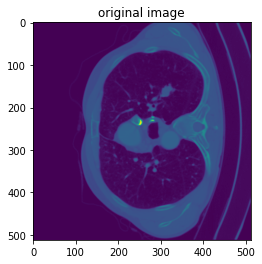

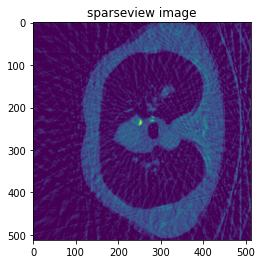

torch.Size([1, 1, 512, 512])


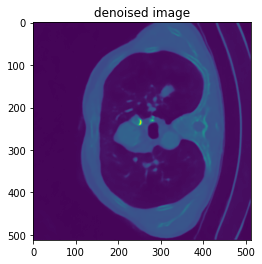

In [19]:
# output test[0] image and save it in the current folder as .png file
with torch.no_grad():
  model.eval()
  denoised_image= model(X_test[0:1,:,:,:])
  print(X_torch.shape)

  plt.title('original image')
  a = ndct_test[0].reshape(512,512)
  plt.imshow(a)
  plt.show()


  plt.title('sparseview image')
  b = ldct_test[0].reshape(512,512)
  plt.imshow(b)
  plt.show()

  plt.title('denoised image')
  print(denoised_image.shape)
  plt.imshow(denoised_image[0].view(512,512).cpu().data.numpy())
  plt.show()


  a = denoised_image[0].view(512,512).cpu().data.numpy()
  scalef = np.amax(a)
  a = np.clip(255 * a/scalef, 0, 255).astype('uint8')
  result = Image.fromarray((a).astype(np.uint8))
  result.save('/content/drive/My Drive/Colab Notebooks/unet_pytorch/sparseview_60_test_0.png')


  denoised_image= model(X_test[12:13,:,:,:])
  a = denoised_image[0].view(512,512).cpu().data.numpy()
  scalef = np.amax(a)
  a = np.clip(255 * a/scalef, 0, 255).astype('uint8')
  result = Image.fromarray((a).astype(np.uint8))
  result.save('/content/drive/My Drive/Colab Notebooks/unet_pytorch/sparseview_60_test_12.png')